## Khai báo thư viện

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, MinMaxScaler,StandardScaler,OneHotEncoder,PowerTransformer
import sys
from sklearn.impute import KNNImputer
import networkx as nx

## Đọc dữ liệu

In [2]:
df = pd.read_csv('D:\\project\\Loan_Default\\dataset\\Loan_Default.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [61]:
df.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [62]:
print(df.describe())

                  ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%       

In [3]:
df = df.drop(columns = 'ID')
df = df.drop(columns = 'year')

In [64]:
print(df['Status'].value_counts())

Status
0    112031
1     36639
Name: count, dtype: int64


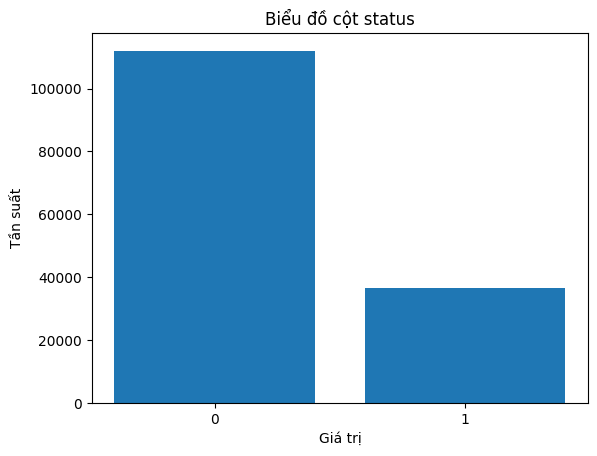

In [65]:
plt.bar(['0','1'], df['Status'].value_counts())
plt.title('Biểu đồ cột status')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.show()

In [66]:
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()

print(f"Số hàng lặp lại: {num_duplicates}")

if num_duplicates > 0:
    print("\nCác hàng bị lặp lại:")
    print(df[duplicate_rows])

Số hàng lặp lại: 0


## Kiểm tra giá trị thiếu và bổ sung

In [4]:
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_summary = pd.DataFrame({
    'Số lượng thiếu': missing_count,
    'Phần trăm thiếu (%)': missing_percent.round(2)
}).sort_values(by='Phần trăm thiếu (%)', ascending=False)

print(missing_summary)

                           Số lượng thiếu  Phần trăm thiếu (%)
Upfront_charges                     39642                26.66
Interest_rate_spread                36639                24.64
rate_of_interest                    36439                24.51
dtir1                               24121                16.22
property_value                      15098                10.16
LTV                                 15098                10.16
income                               9150                 6.15
loan_limit                           3344                 2.25
approv_in_adv                         908                 0.61
age                                   200                 0.13
submission_of_application             200                 0.13
loan_purpose                          134                 0.09
Neg_ammortization                     121                 0.08
term                                   41                 0.03
business_or_commercial                  0              

In [5]:
columns_with_missing = df.columns[df.isnull().any()]
df_missing_columns = df[columns_with_missing]
print("Các cột có giá trị thiếu:")
print(df_missing_columns.columns)

Các cột có giá trị thiếu:
Index(['loan_limit', 'approv_in_adv', 'loan_purpose', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'property_value', 'income', 'age', 'submission_of_application', 'LTV',
       'dtir1'],
      dtype='object')


In [69]:
df_missing_columns.head(3)

,loan_limit,approv_in_adv,loan_purpose,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,property_value,income,age,submission_of_application,LTV,dtir1
0,cf,nopre,p1,NaN,NaN,NaN,360.0,not_neg,118000.0,1740.0,25-34,to_inst,98.728814,45.0
1,cf,nopre,p1,NaN,NaN,NaN,360.0,not_neg,NaN,4980.0,55-64,to_inst,NaN,NaN
2,cf,pre,p1,4.56,0.2,595.0,360.0,neg_amm,508000.0,9480.0,35-44,to_inst,80.019685,46.0


In [6]:
label = df['Status']

In [7]:
df_missing_columns2 = df_missing_columns.notnull().astype(int)
df_missing_columns2.head(5)

,loan_limit,approv_in_adv,loan_purpose,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,property_value,income,age,submission_of_application,LTV,dtir1
0,1,1,1,0,0,0,1,1,1,1,1,1,1,1
1,1,1,1,0,0,0,1,1,0,1,1,1,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,0,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [8]:
df_missing_columns2['Status'] = label
correlation_matrix = df_missing_columns2.corr()

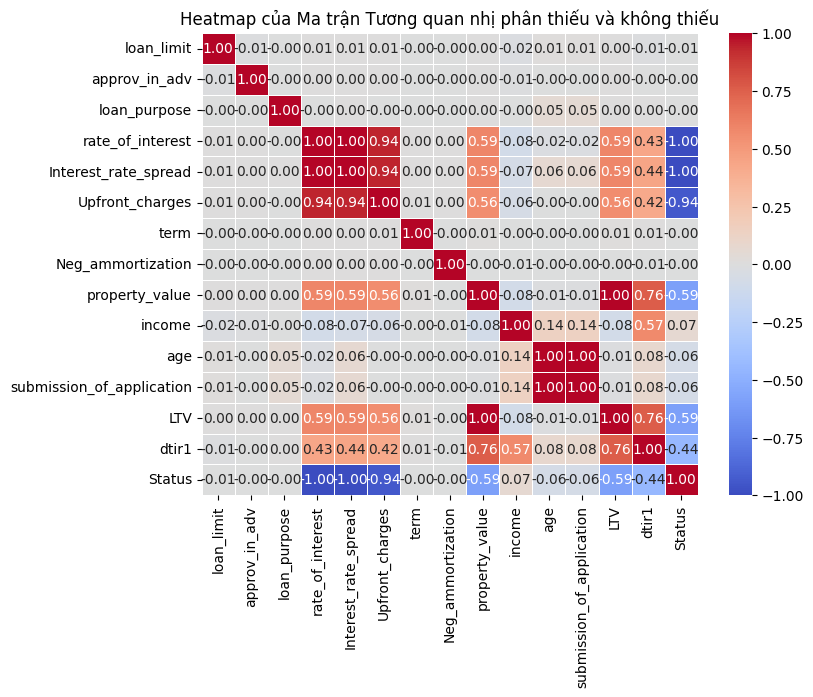

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap của Ma trận Tương quan nhị phân thiếu và không thiếu')
plt.show()

In [10]:
correlation_with_status = correlation_matrix['Status']
strong_correlation_columns = correlation_with_status[abs(correlation_with_status) > 0.4].drop('Status')
print("Các cột có mức tương quan mạnh với 'status':")
print(strong_correlation_columns)

Các cột có mức tương quan mạnh với 'status':
rate_of_interest       -0.996378
Interest_rate_spread   -1.000000
Upfront_charges        -0.943005
property_value         -0.587791
LTV                    -0.587791
dtir1                  -0.438839
Name: Status, dtype: float64


In [11]:
nan_processing_input_avg = ['rate_of_interest','Interest_rate_spread','Upfront_charges','property_value','LTV','dtir1']
for col in nan_processing_input_avg:
    missing_mask = df[col].isna()
    df[f"{col}_missing"] = missing_mask.astype(int)
    df.loc[missing_mask, col] = 0

print(df)

       loan_limit             Gender approv_in_adv loan_type loan_purpose  \
0              cf  Sex Not Available         nopre     type1           p1   
1              cf               Male         nopre     type2           p1   
2              cf               Male           pre     type1           p1   
3              cf               Male         nopre     type1           p4   
4              cf              Joint           pre     type1           p1   
...           ...                ...           ...       ...          ...   
148665         cf  Sex Not Available         nopre     type1           p3   
148666         cf               Male         nopre     type1           p1   
148667         cf               Male         nopre     type1           p4   
148668         cf             Female         nopre     type1           p4   
148669         cf             Female         nopre     type1           p3   

       Credit_Worthiness open_credit business_or_commercial  loan_amount  \

In [12]:
missing_columns = [col for col in nan_processing_input_avg if df[col].isnull().sum() > 0]
print(f"📌 Số cột có giá trị thiếu: {len(missing_columns)}")
print("🧐 Các cột có giá trị thiếu:", missing_columns)

📌 Số cột có giá trị thiếu: 0
🧐 Các cột có giá trị thiếu: []


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 38 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan_limit                    145326 non-null  object 
 1   Gender                        148670 non-null  object 
 2   approv_in_adv                 147762 non-null  object 
 3   loan_type                     148670 non-null  object 
 4   loan_purpose                  148536 non-null  object 
 5   Credit_Worthiness             148670 non-null  object 
 6   open_credit                   148670 non-null  object 
 7   business_or_commercial        148670 non-null  object 
 8   loan_amount                   148670 non-null  int64  
 9   rate_of_interest              148670 non-null  float64
 10  Interest_rate_spread          148670 non-null  float64
 11  Upfront_charges               148670 non-null  float64
 12  term                          148629 non-nul

## Kiểu dữ liệu float

In [14]:
float_cols = df.select_dtypes(include=['float']).columns
print("Các cột kiểu float:", float_cols)

Các cột kiểu float: Index(['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term',
       'property_value', 'income', 'LTV', 'dtir1'],
      dtype='object')


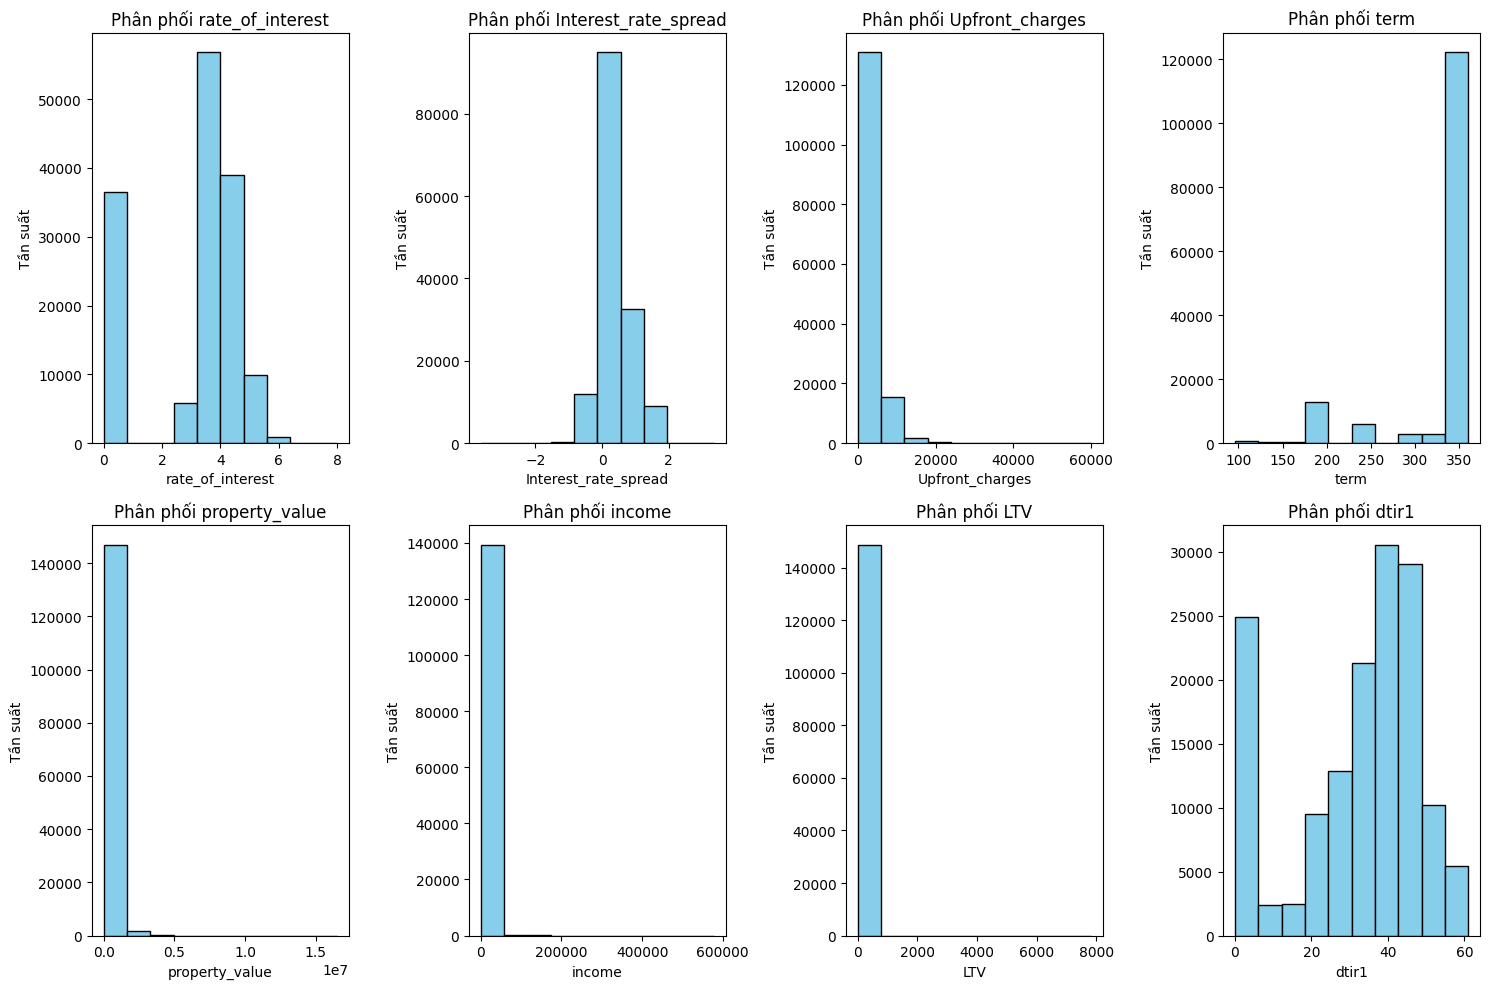

In [15]:
rows = (len(float_cols) // 4) + (len(float_cols) % 4 > 0)
plt.figure(figsize=(15, rows * 5))

for i, col in enumerate(float_cols, 1):
    plt.subplot(rows, 4, i)
    plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Phân phối {col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()

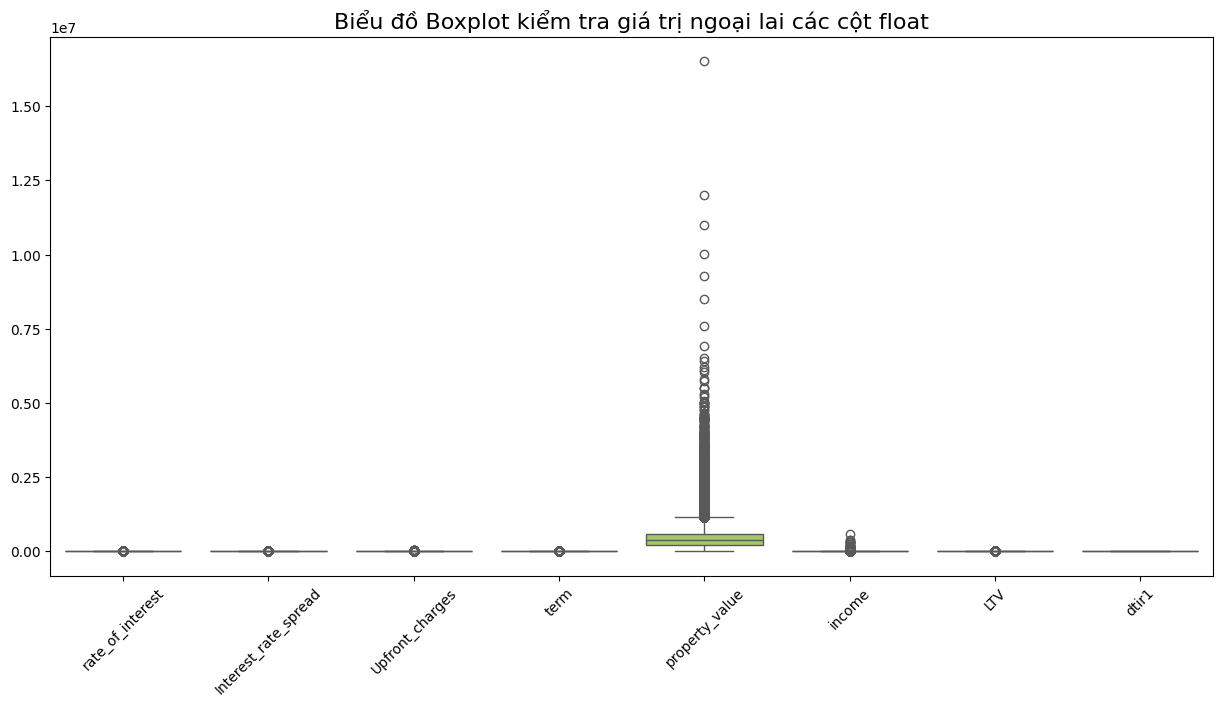

In [16]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df[float_cols], palette="Set2")

plt.title("Biểu đồ Boxplot kiểm tra giá trị ngoại lai các cột float", fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [18]:
robust_cols = ['property_value','income']
minmax_cols = ['rate_of_interest', 'Interest_rate_spread','term']
standard_cols = ['dtir1', 'LTV']
power_cols = ['Upfront_charges']  

scaler_robust = RobustScaler()
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()
scaler_power = PowerTransformer(method='yeo-johnson')

df[robust_cols] = scaler_robust.fit_transform(df[robust_cols])
df[minmax_cols] = scaler_minmax.fit_transform(df[minmax_cols])
df[standard_cols] = scaler_standard.fit_transform(df[standard_cols])
df[power_cols] = scaler_power.fit_transform(df[power_cols])

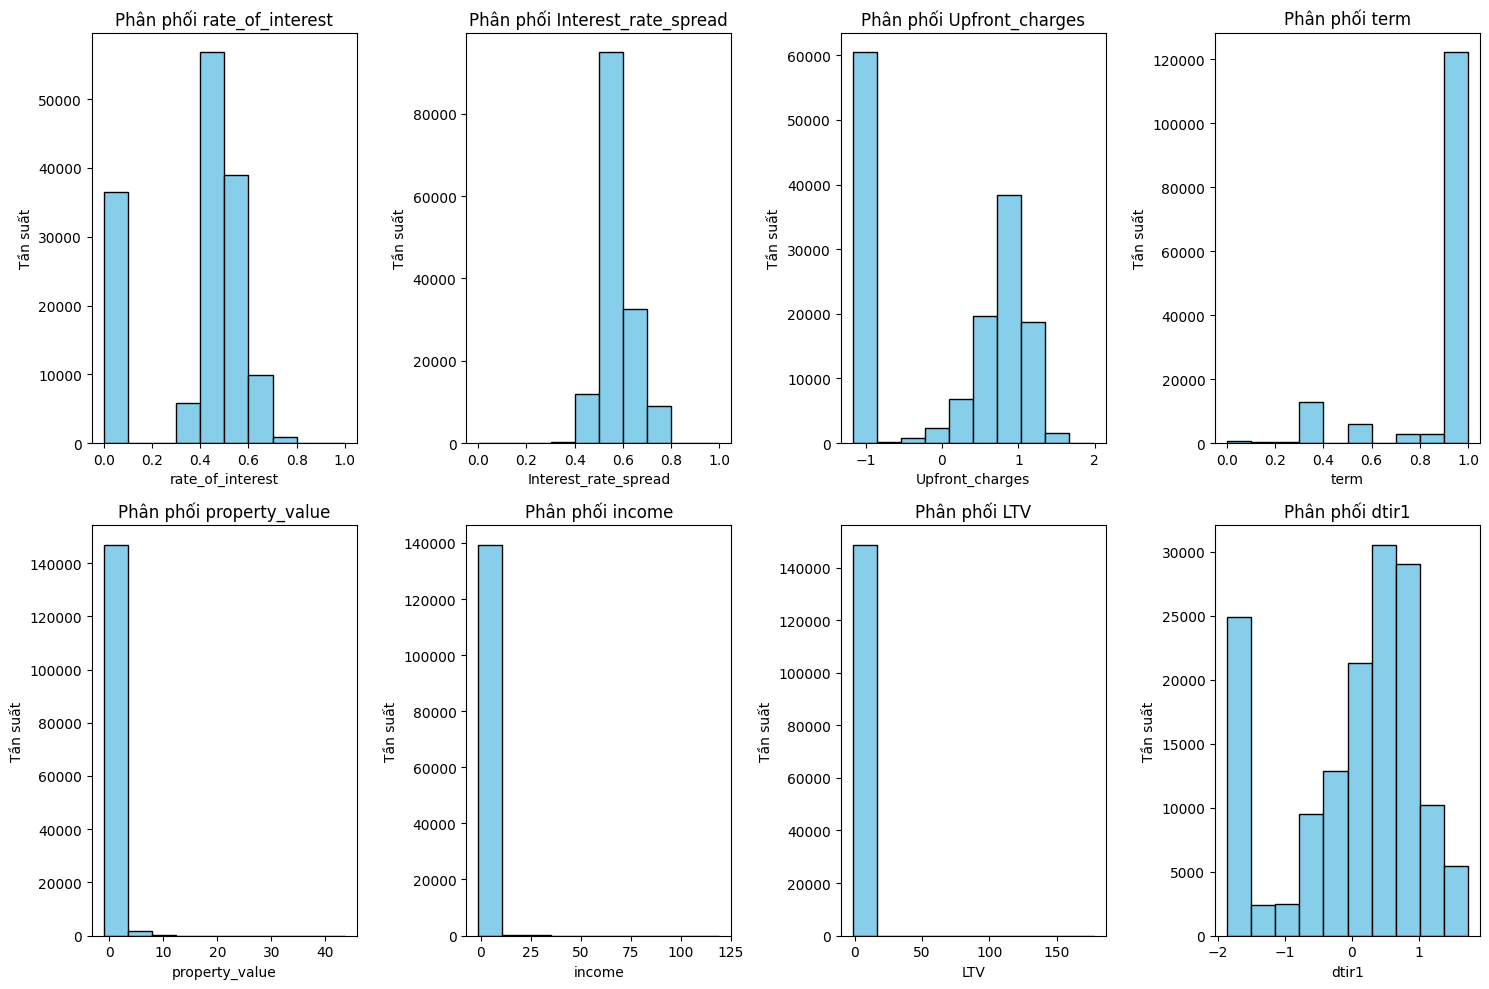

In [19]:
rows = (len(float_cols) // 4) + (len(float_cols) % 4 > 0)
plt.figure(figsize=(15, rows * 5))

for i, col in enumerate(float_cols, 1):
    plt.subplot(rows, 4, i)
    plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Phân phối {col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()

## Kiểu dữ liệu int

In [20]:
int_cols = df.select_dtypes(include=['int']).columns
print("Các cột kiểu int:", int_cols)

Các cột kiểu int: Index(['loan_amount', 'Credit_Score', 'Status', 'rate_of_interest_missing',
       'Interest_rate_spread_missing', 'Upfront_charges_missing',
       'property_value_missing', 'LTV_missing', 'dtir1_missing'],
      dtype='object')


In [21]:
cols_to_check = ['loan_amount', 'Credit_Score', 'Status']
missing_count = df[cols_to_check].isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_summary = pd.DataFrame({
    'Số lượng thiếu': missing_count,
    'Phần trăm thiếu (%)': missing_percent.round(2)
})
print(missing_summary)

              Số lượng thiếu  Phần trăm thiếu (%)
loan_amount                0                  0.0
Credit_Score               0                  0.0
Status                     0                  0.0


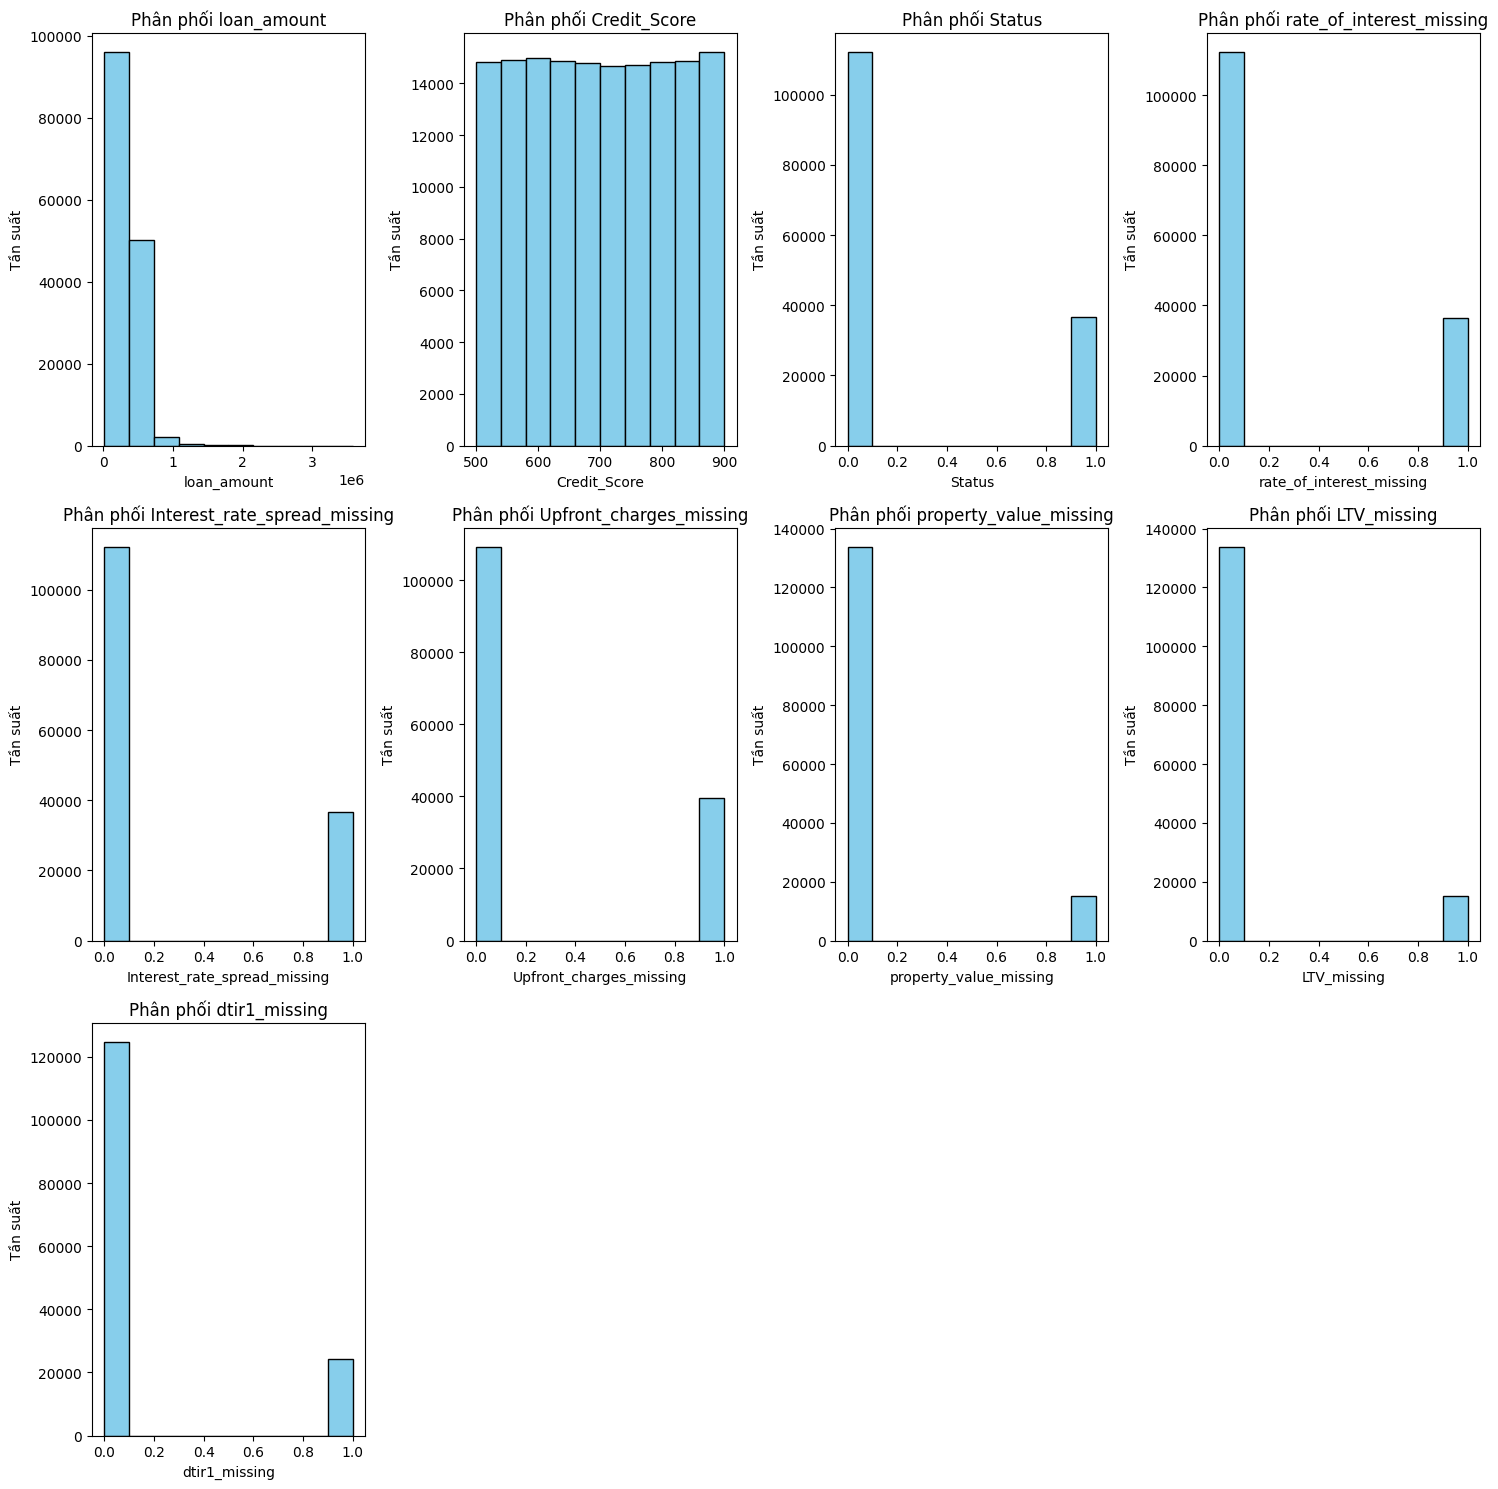

In [22]:
rows = (len(int_cols) // 3) + (len(int_cols) % 3 > 0)
plt.figure(figsize=(15, rows * 5))

for i, col in enumerate(int_cols, 1):
    plt.subplot(rows, 4, i)
    plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Phân phối {col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()

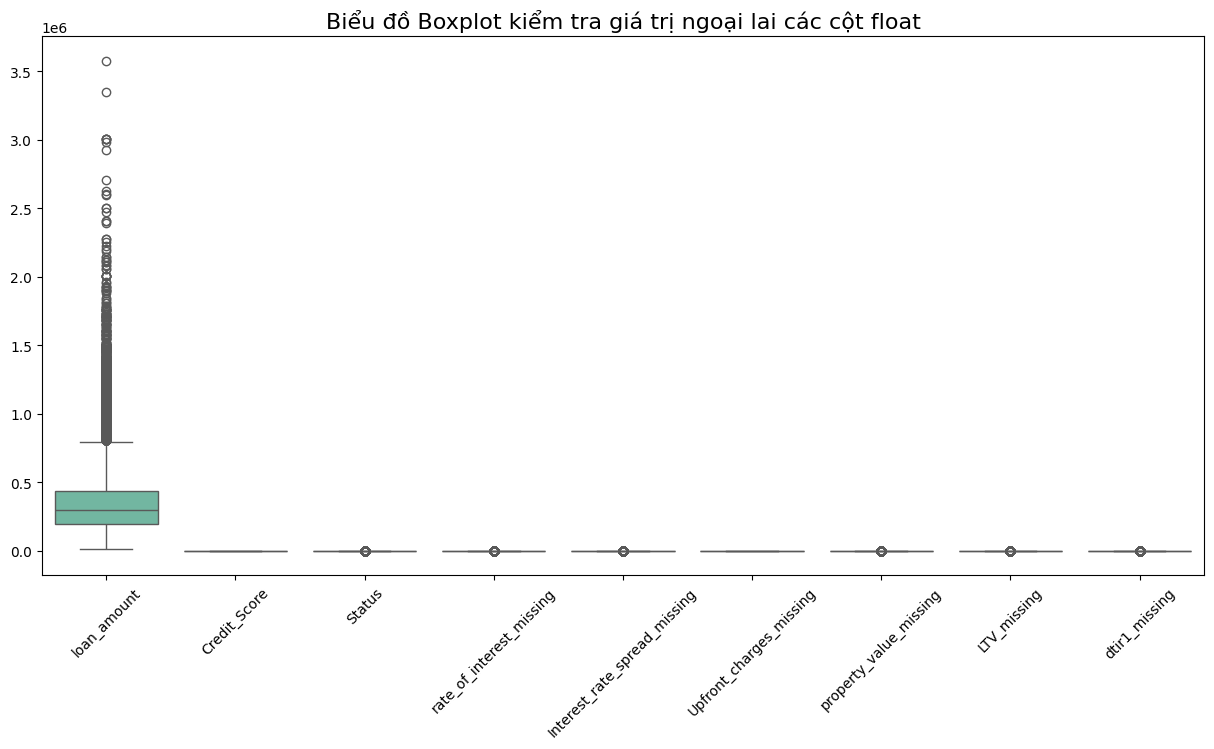

In [23]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df[int_cols], palette="Set2")

plt.title("Biểu đồ Boxplot kiểm tra giá trị ngoại lai các cột float", fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [24]:
robustscaler_int = RobustScaler()
MinMaxScaler_int = MinMaxScaler()
df[['loan_amount']] = robustscaler_int.fit_transform(df[['loan_amount']])
df[['Credit_Score']] = MinMaxScaler_int.fit_transform(df[['Credit_Score']])

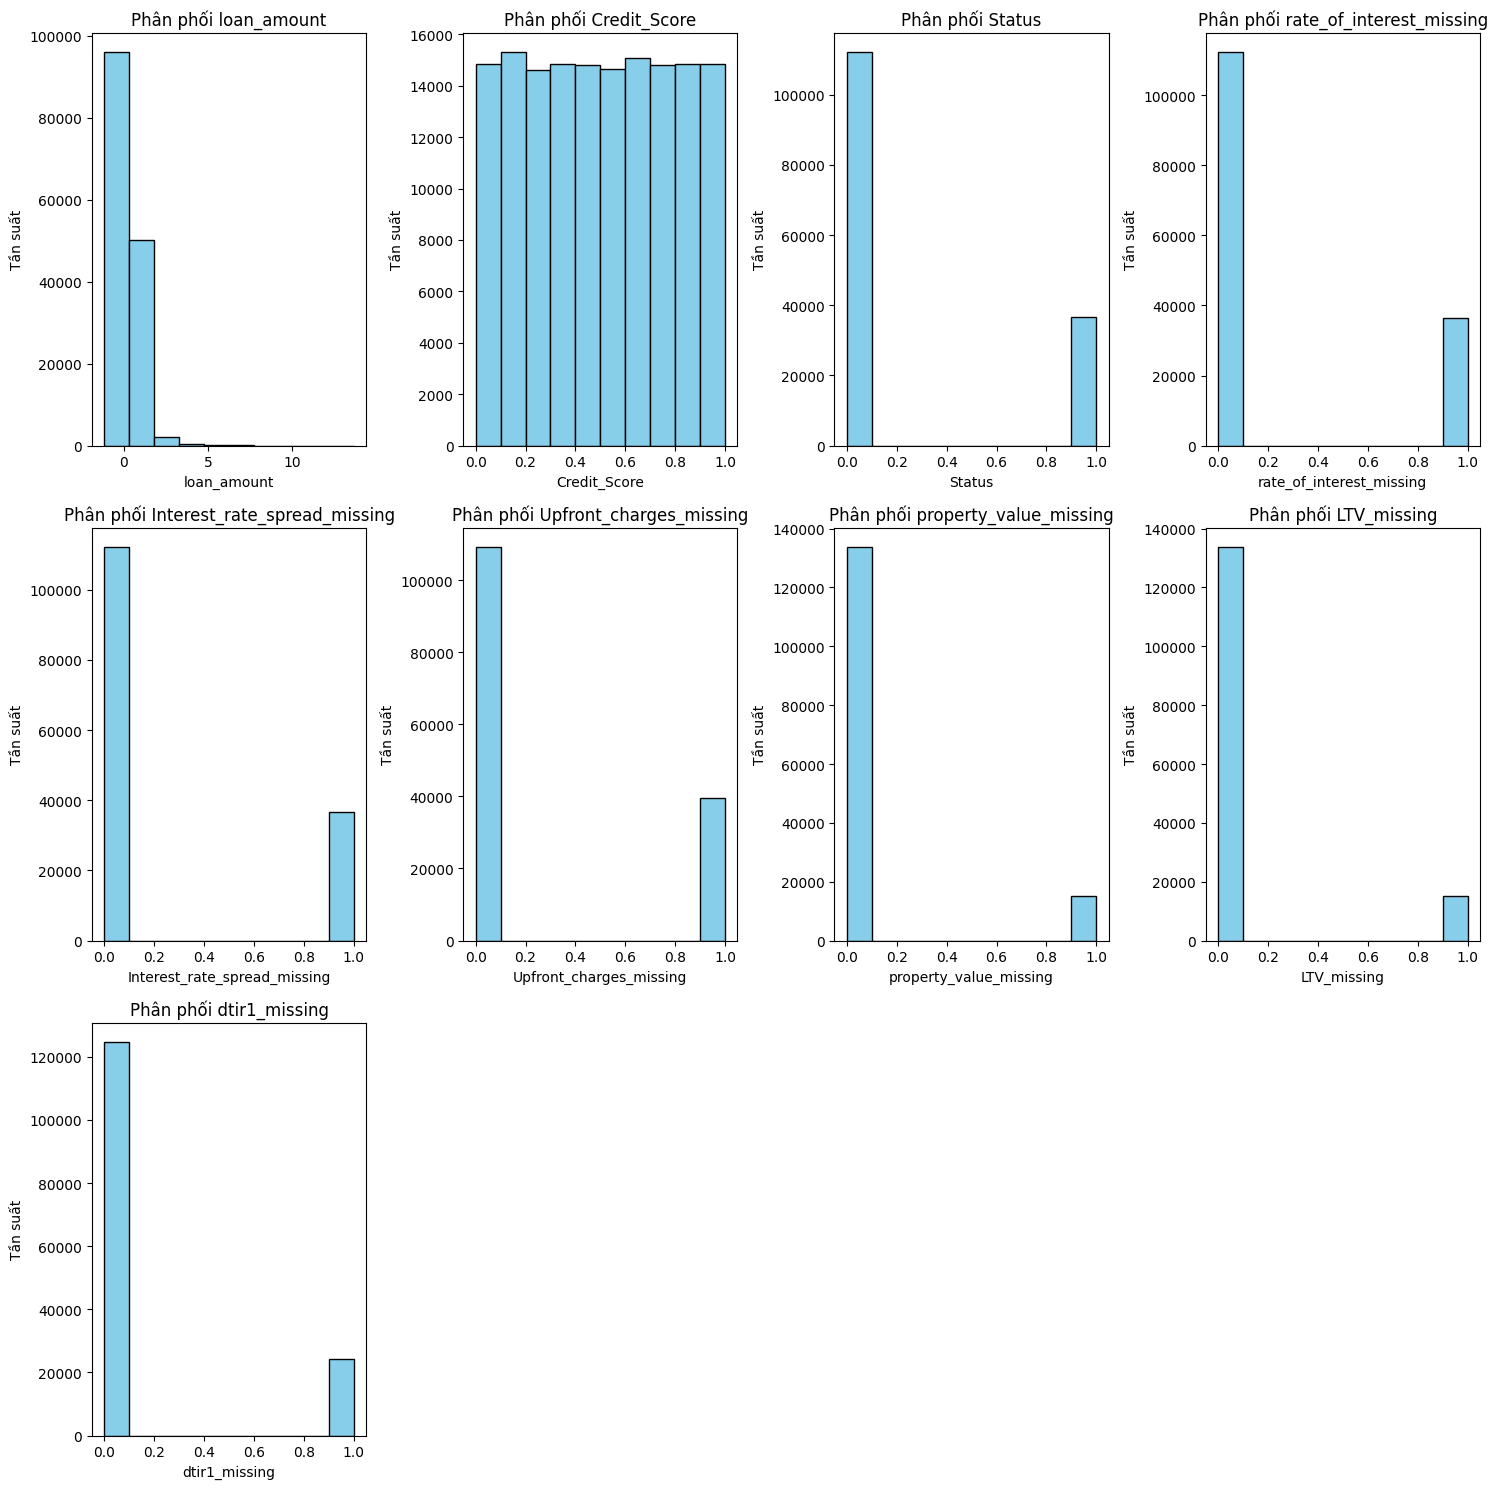

In [25]:
rows = (len(int_cols) // 3) + (len(int_cols) % 3 > 0)
plt.figure(figsize=(15, rows * 5))

for i, col in enumerate(int_cols, 1):
    plt.subplot(rows, 4, i)
    plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Phân phối {col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()

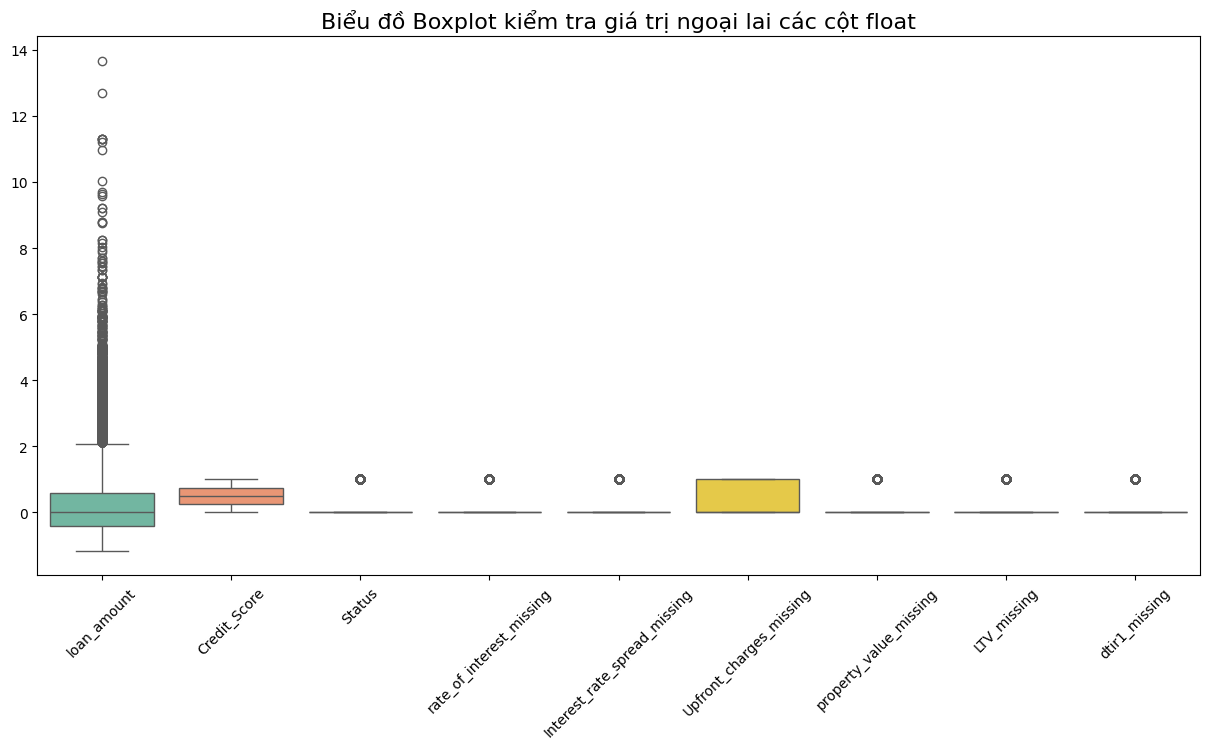

In [26]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df[int_cols], palette="Set2")

plt.title("Biểu đồ Boxplot kiểm tra giá trị ngoại lai các cột float", fontsize=16)
plt.xticks(rotation=45)
plt.show()

## Kiểu dữ liệu object

In [27]:
object_cols = df.select_dtypes(include='object').columns
print("Các cột kiểu object:", list(object_cols))

Các cột kiểu object: ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']



Cột 'loan_limit' có 3 nhãn: ['cf' nan 'ncf']


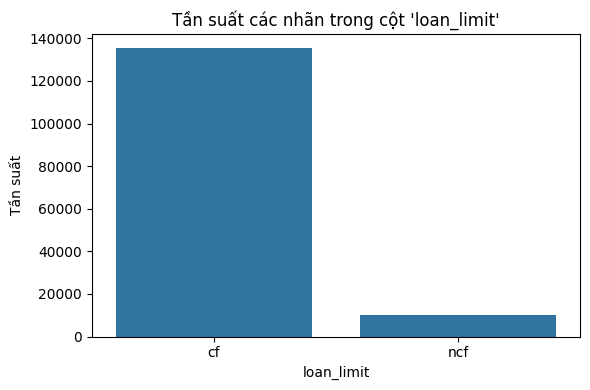


Cột 'Gender' có 4 nhãn: ['Sex Not Available' 'Male' 'Joint' 'Female']


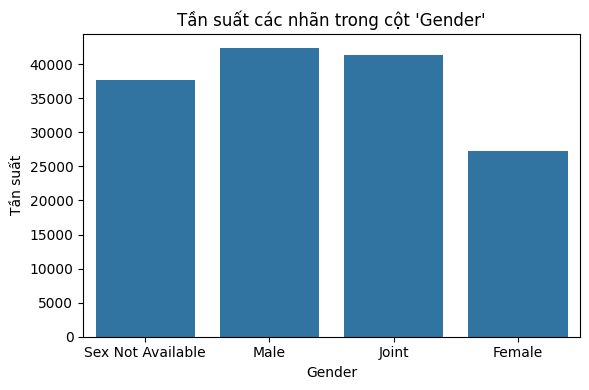


Cột 'approv_in_adv' có 3 nhãn: ['nopre' 'pre' nan]


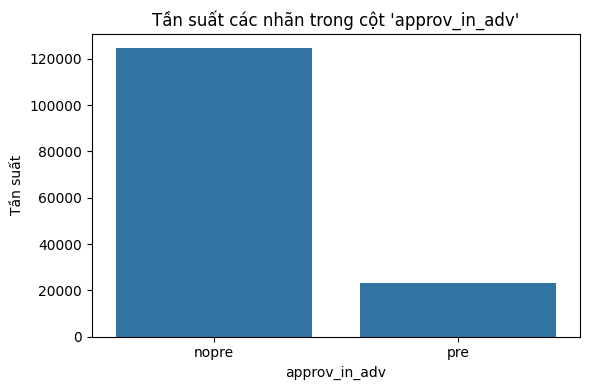


Cột 'loan_type' có 3 nhãn: ['type1' 'type2' 'type3']


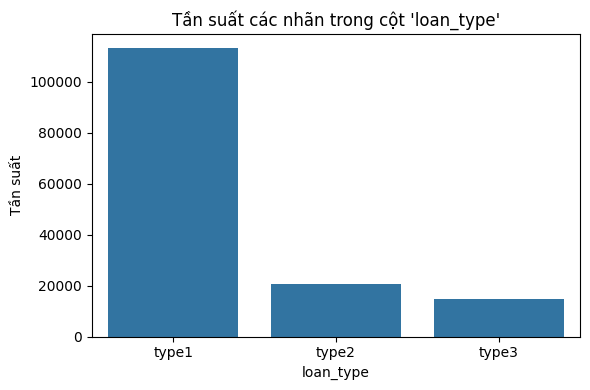


Cột 'loan_purpose' có 5 nhãn: ['p1' 'p4' 'p3' 'p2' nan]


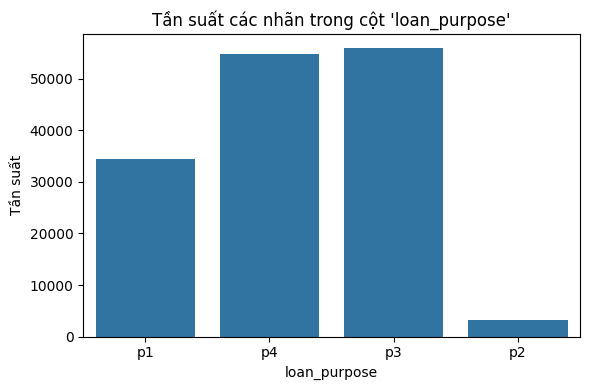


Cột 'Credit_Worthiness' có 2 nhãn: ['l1' 'l2']


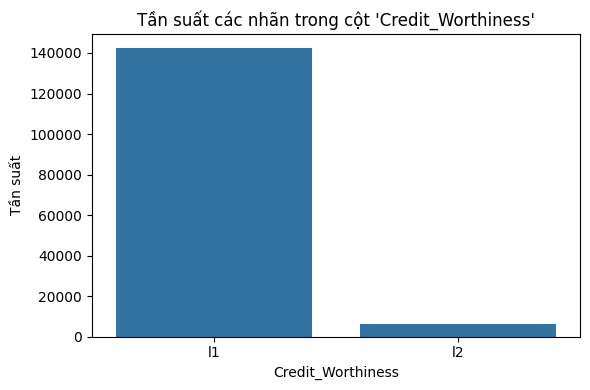


Cột 'open_credit' có 2 nhãn: ['nopc' 'opc']


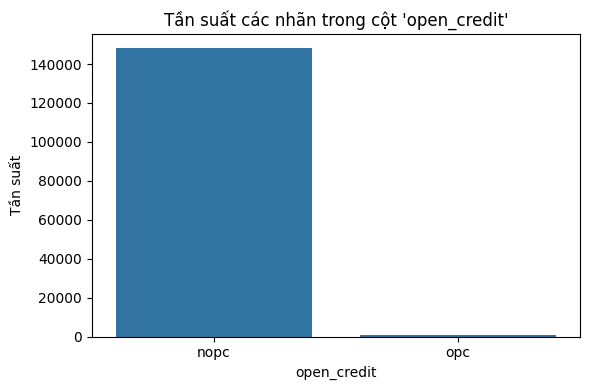


Cột 'business_or_commercial' có 2 nhãn: ['nob/c' 'b/c']


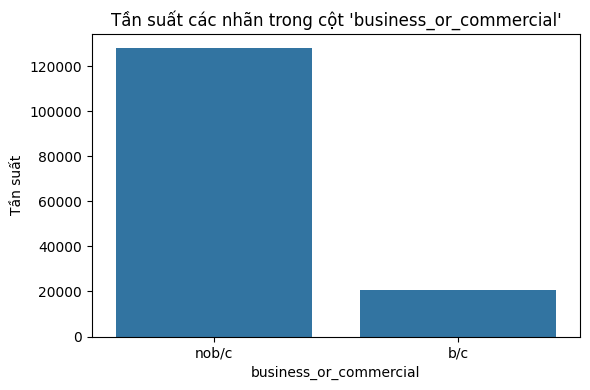


Cột 'Neg_ammortization' có 3 nhãn: ['not_neg' 'neg_amm' nan]


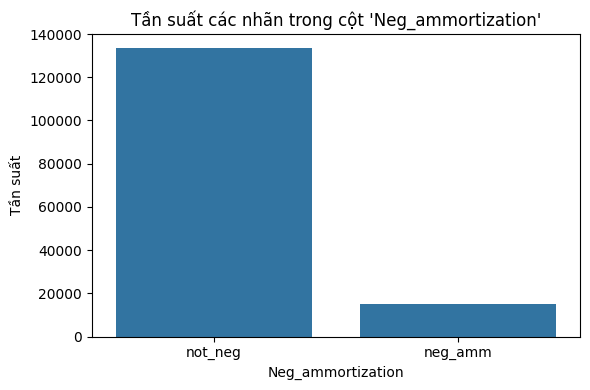


Cột 'interest_only' có 2 nhãn: ['not_int' 'int_only']


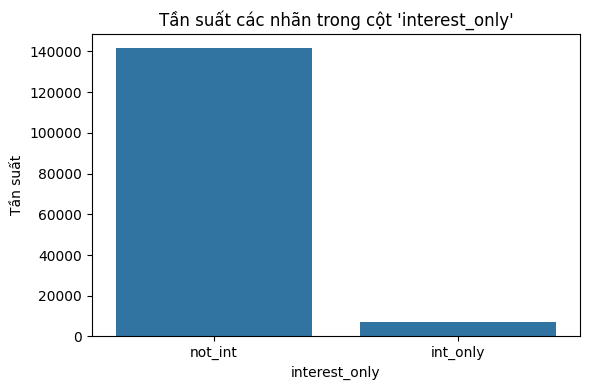


Cột 'lump_sum_payment' có 2 nhãn: ['not_lpsm' 'lpsm']


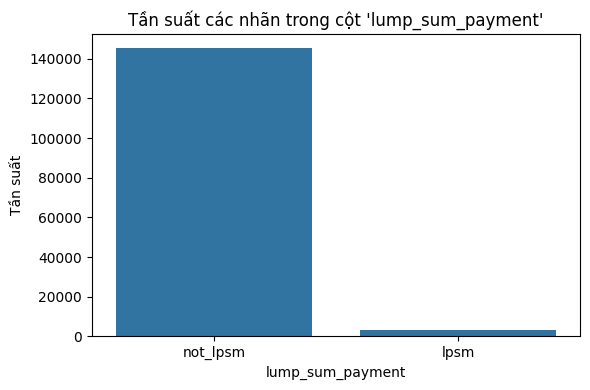


Cột 'construction_type' có 2 nhãn: ['sb' 'mh']


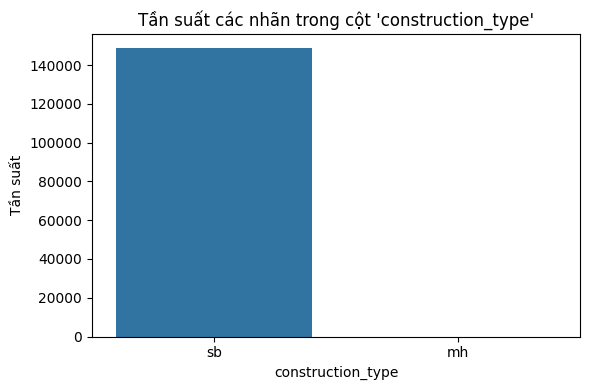


Cột 'occupancy_type' có 3 nhãn: ['pr' 'sr' 'ir']


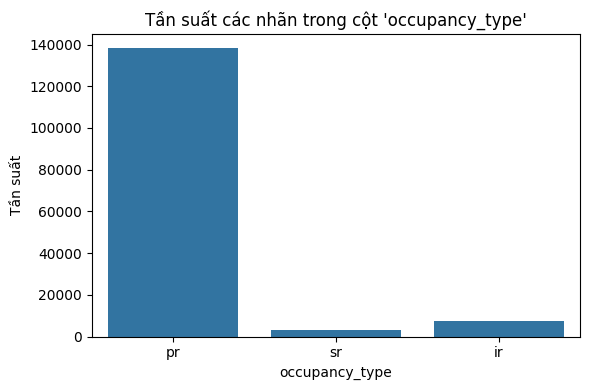


Cột 'Secured_by' có 2 nhãn: ['home' 'land']


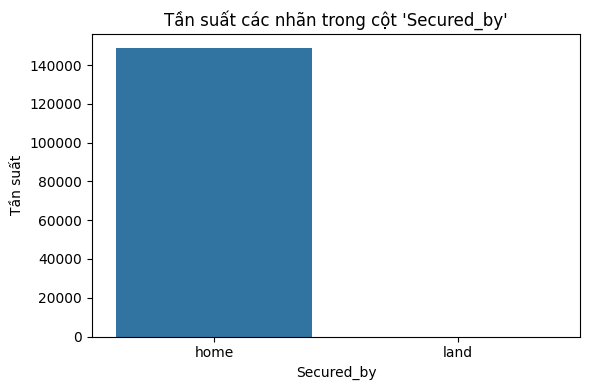


Cột 'total_units' có 4 nhãn: ['1U' '2U' '3U' '4U']


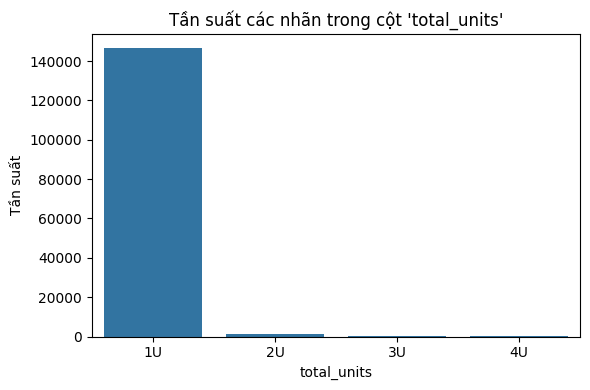


Cột 'credit_type' có 4 nhãn: ['EXP' 'EQUI' 'CRIF' 'CIB']


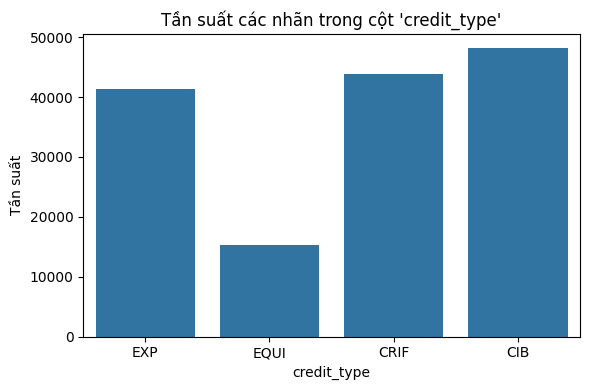


Cột 'co-applicant_credit_type' có 2 nhãn: ['CIB' 'EXP']


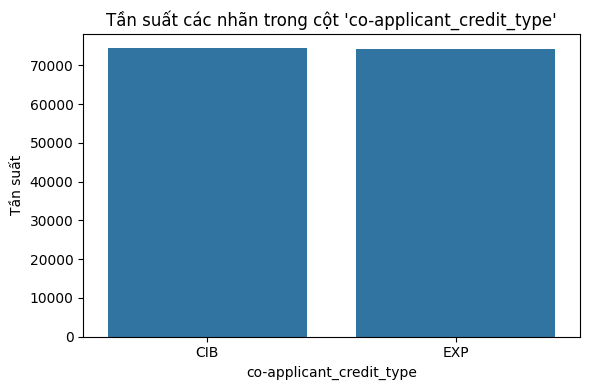


Cột 'age' có 8 nhãn: ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]


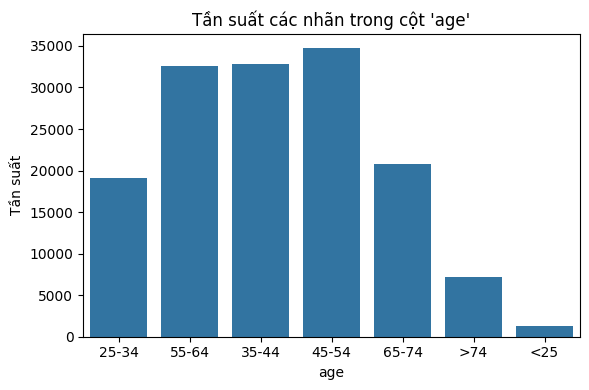


Cột 'submission_of_application' có 3 nhãn: ['to_inst' 'not_inst' nan]


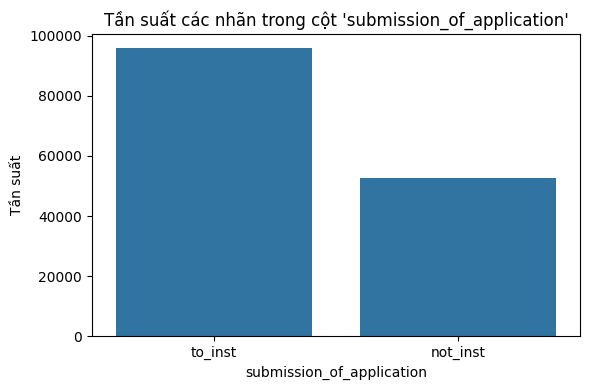


Cột 'Region' có 4 nhãn: ['south' 'North' 'central' 'North-East']


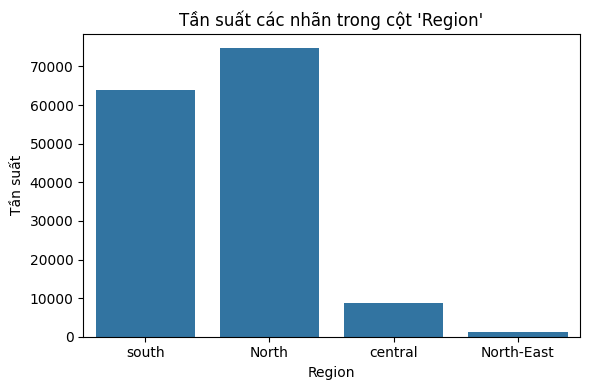


Cột 'Security_Type' có 2 nhãn: ['direct' 'Indriect']


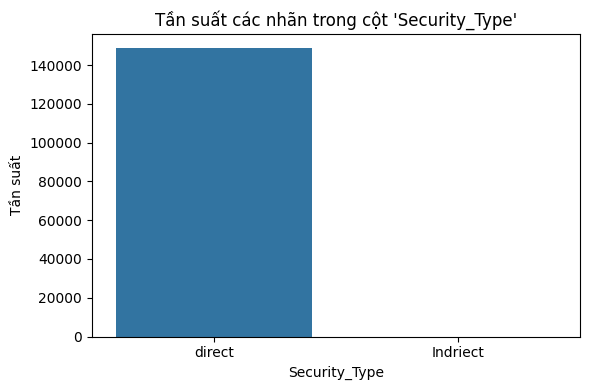

In [28]:
for col in object_cols:
    unique_vals = df[col].unique()
    print(f"\nCột '{col}' có {len(unique_vals)} nhãn: {unique_vals}")
    
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Tần suất các nhãn trong cột '{col}'")
    plt.xlabel(col)
    plt.ylabel("Tần suất")
    plt.tight_layout()
    plt.show()

## Bổ sung giá trị thiếu bằng KNN